# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import csv

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return text

def generate_trigrams(text):
    words = text.split()
    trigrams = [(words[i], words[i+1], words[i+2]) for i in range(len(words)-2)]
    return trigrams

def count_trigram_frequency(trigrams):
    trigram_counts = {}
    for trigram in trigrams:
        if trigram in trigram_counts:
            trigram_counts[trigram] += 1
        else:
            trigram_counts[trigram] = 1
    return trigram_counts

def main():
    # Open the CSV file (replace 'dataset.csv' with your dataset file path)
    with open('cleaned_movie_reviews .csv', 'r', encoding='utf-8') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)
        # Skip the header row
        next(csv_reader)
        # Read text data from the 'review' column
        text_data = [row[0] for row in csv_reader]

    # Preprocess the text data
    preprocessed_data = [preprocess_text(text) for text in text_data]

    # Generate trigrams
    all_trigrams = [generate_trigrams(text) for text in preprocessed_data]

    # Flatten the list of trigrams
    flattened_trigrams = [trigram for sublist in all_trigrams for trigram in sublist]

    # Count the frequency of each trigram
    trigram_counts = count_trigram_frequency(flattened_trigrams)

    # Print the frequency of all trigrams
    print("Frequency of all trigrams:")
    for trigram, frequency in trigram_counts.items():
        print(trigram, ":", frequency)

if __name__ == "__main__":
    main()


Frequency of all trigrams:
('could', 'be', 'so') : 40
('be', 'so', 'much') : 40
('so', 'much', 'better') : 40
('much', 'better', 'but') : 40
('better', 'but', 'one') : 40
('but', 'one', 'scene') : 40
('one', 'scene', 'ruined') : 40
('scene', 'ruined', 'the') : 40
('ruined', 'the', 'whole') : 40
('the', 'whole', 'the') : 40
('whole', 'the', 'movie') : 40
('the', 'movie', 'to') : 40
('movie', 'to', 'be') : 40
('to', 'be', 'a') : 120
('be', 'a', 'topnotch') : 40
('a', 'topnotch', 'action') : 40
('topnotch', 'action', 'flicgrace') : 40
('action', 'flicgrace', 'is') : 40
('flicgrace', 'is', 'the') : 40
('is', 'the', 'threatened') : 40
('the', 'threatened', 'by') : 40
('threatened', 'by', 'a') : 40
('by', 'a', 'gunman') : 40
('a', 'gunman', 'on') : 40
('gunman', 'on', 'a') : 40
('on', 'a', 'moving') : 40
('a', 'moving', 'train') : 40
('moving', 'train', 'but') : 40
('train', 'but', 'thanks') : 40
('but', 'thanks', 'god') : 40
('thanks', 'god', 'that') : 40
('god', 'that', 'there') : 40
('tha

In [ ]:
import csv

def process_reviews(input_csv):
    # Initialize a dictionary to store bigram counts
    ngram_counts = {}

    # Read the CSV file and process reviews
    with open(input_csv, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            # Lowercase the review text
            review = row[0].lower()  # Assuming review text is in the first column
            # Split review into words
            words = review.split()
            # Iterate through words to create bigrams
            for i in range(len(words) - 1):
                bigram = (words[i], words[i+1])
                # Increment bigram count in the dictionary
                ngram_counts[bigram] = ngram_counts.get(bigram, 0) + 1

    return ngram_counts

def calculate_probabilities(ngram_counts):
    # Initialize a dictionary to store bigram probabilities
    ngram_probabilities = {}

    # Calculate probabilities for each bigram
    for ngram, count in ngram_counts.items():
        word2 = ngram[1]
        # Calculate total count of bigrams with the same second word
        total_count = sum(value for key, value in ngram_counts.items() if key[1] == word2)
        # Calculate probability for the current bigram
        probability = count / total_count
        # Store the probability in the dictionary
        ngram_probabilities[ngram] = probability

    return ngram_probabilities

def main():
    input_csv_file = 'cleaned_movie_reviews .csv'

    # Process reviews to get bigram counts
    ngram_counts = process_reviews(input_csv_file)

    # Calculate probabilities for bigrams
    ngram_probabilities = calculate_probabilities(ngram_counts)

    # Print probabilities for all bigrams
    print("Probabilities for all bigrams:")
    for ngram, prob in sorted(ngram_probabilities.items()):
        print(ngram, ":", prob)

if __name__ == "__main__":
    main()


Probabilities for all bigrams:
('"emotional"', 'growth') : 1.0
('"entity"', 'is') : 0.012987012987012988
('"entity".', 'well,') : 1.0
('"how', 'many') : 0.125
('"mind', 'the') : 0.003115264797507788
('"mission:', 'impossible') : 0.17391304347826086
('"probably', 'stuff') : 0.5
('"shark', 'sandwich"') : 1.0
('"william', 'shatner') : 1.0
('&', 'statler:') : 1.0
("'dead", "reckoning'") : 1.0
("'demon", "seed'") : 1.0
("'fallout'", 'so') : 0.037037037037037035
("'fallout'", 'was') : 0.02564102564102564
("'fallout,'", 'which') : 0.1
("'ghost", "protocol':") : 1.0
("'ghosts", 'of') : 0.007751937984496124
('\'khan!\'"', 'moment') : 1.0
("'mission:", "impossible'") : 1.0
("'the", "terminator'") : 1.0
('(&', 'plot)') : 1.0
('(bad', 'ludicrous,') : 1.0
('(but', 'i') : 0.016666666666666666
('(mad', 'max') : 1.0
('(or', 'even') : 0.09090909090909091
('(that', 'would') : 0.25
('(though', 'as') : 0.02127659574468085
('(which', 'came') : 1.0
(',', 'very') : 0.06666666666666667
('-', 'and') : 0.025806

In [ ]:
import csv
import re

def clean_text(text):
    # Implement any text cleaning techniques here if needed
    cleaned_text = text.lower()  # Convert text to lowercase
    return cleaned_text

def extract_noun_phrases(text):
    # Use a simple pattern to identify noun phrases (sequence of one or more nouns)
    noun_phrases = re.findall(r'\b(?:\w+(?:\s+|\s*-\s*)?)+\b', text)
    return noun_phrases

def calculate_phrase_frequencies(csv_file):
    phrase_freq = {}
    max_freq_per_phrase = {}

    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            cleaned_review = clean_text(row[0])  # Assuming cleaned review is in the first column
            phrases = extract_noun_phrases(cleaned_review)

            for phrase in phrases:
                if phrase in phrase_freq:
                    phrase_freq[phrase] += 1
                else:
                    phrase_freq[phrase] = 1

    # Calculate max frequency per phrase across all reviews
    for phrase in phrase_freq:
        max_freq_per_phrase[phrase] = max(phrase_freq.values())

    return phrase_freq, max_freq_per_phrase

def calculate_relative_probabilities(csv_file):
    phrase_freq, max_freq_per_phrase = calculate_phrase_frequencies(csv_file)
    relative_probabilities = []

    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            cleaned_review = clean_text(row[0])  # Assuming cleaned review is in the first column
            phrases = extract_noun_phrases(cleaned_review)

            probabilities = {}
            for phrase in phrases:
                probability = phrase_freq[phrase] / max_freq_per_phrase[phrase]
                probabilities[phrase] = probability

            relative_probabilities.append(probabilities)

    return relative_probabilities

def main():
    csv_file = 'cleaned_movie_reviews .csv'

    relative_probabilities = calculate_relative_probabilities(csv_file)

    # Print out the results in a table format
    print("Review\t\t\t\tPhrase\t\tRelative Probability")
    for i, probs in enumerate(relative_probabilities):
        for phrase, prob in probs.items():
            print(f"Review {i+1}\t\t{phrase}\t\t{prob:.2f}")

if __name__ == "__main__":
    main()


Review				Phrase		Relative Probability
Review 1		could be so much better but one scene ruined the whole the movie to be a top-notch action flic		0.07
Review 1		grace is the threatened by a gunman on a moving train		0.07
Review 1		but thanks god that there is ethan hunt		0.07
Review 1		he managed to jump with a parachute from a mountain and reaches easily the moving train		0.07
Review 1		for sure he exactly lands in the carriage where the guy points his gun to grace and knocks him down without effort		0.07
Review 1		for me the most realistic and best timed scene ever		0.07
Review 1		it was splendid		0.07
Review 1		it deserves an own category at the golden rapsberry awards		0.07
Review 1		actually		0.07
Review 1		the movie started quite intense with the scene in the submarine and the situation in the arabian desert		0.07
Review 1		the chase at abu dhabi airport was well-performed and the plot quite decent until this moment		0.07
Review 1		after this point the movie loses its grip		0.07
R

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import csv
import re
import math

def clean_text(text):
    # Remove special characters and convert to lowercase
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    return cleaned_text

def tokenize_text(text):
    # Tokenize text by splitting on whitespace
    return text.split()

def calculate_tf(text):
    # Calculate term frequency (tf)
    tokens = tokenize_text(text)
    tf = {}
    total_terms = len(tokens)
    for token in tokens:
        tf[token] = tf.get(token, 0) + 1 / total_terms
    return tf

def calculate_idf(documents):
    # Calculate inverse document frequency (idf)
    document_frequency = {}
    num_documents = len(documents)

    # Initialize IDF with all unique terms observed in the documents
    unique_terms = set()
    for document in documents:
        tokens = set(tokenize_text(document))
        unique_terms.update(tokens)

    idf = {term: 0 for term in unique_terms}  # Initialize IDF with all terms

    # Update document frequency for each term
    for document in documents:
        tokens = set(tokenize_text(document))
        for token in tokens:
            document_frequency[token] = document_frequency.get(token, 0) + 1

    # Calculate IDF for each term
    for term, freq in document_frequency.items():
        idf[term] = math.log(num_documents / (freq + 1))  # Add smoothing to avoid division by zero

    return idf

def calculate_tf_idf(tf, idf):
    # Calculate tf-idf for a document
    tf_idf = {}
    for term, freq in tf.items():
        tf_idf[term] = freq * idf.get(term, 0)  # Use get method with default value of 0
    return tf_idf

def cosine_similarity(vec1, vec2):
    # Calculate cosine similarity between two vectors
    dot_product = sum(vec1[term] * vec2[term] for term in vec1 if term in vec2)
    magnitude1 = math.sqrt(sum(value ** 2 for value in vec1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vec2.values()))
    return dot_product / (magnitude1 * magnitude2)

def load_documents_from_csv(csv_file):
    # Load documents from CSV file
    documents = []
    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            documents.append(row[0])  # Assuming text is in the first column
    return documents

if __name__ == '__main__':
    # Load documents from CSV file
    csv_file = 'cleaned_movie_reviews .csv'
    documents = load_documents_from_csv(csv_file)

    # Clean documents and calculate term frequencies (tf) for each document
    tf_documents = [calculate_tf(clean_text(document)) for document in documents]

    # Calculate inverse document frequency (idf) for all terms
    idf = calculate_idf(documents)

    # Calculate tf-idf matrix for all documents
    tfidf_documents = [{term: freq * idf.get(term, 0) for term, freq in tf.items()} for tf in tf_documents]

    # Define new query
    query = "A captivating story with brilliant cinematography and mesmerizing performances"
    query_tf = calculate_tf(clean_text(query))
    query_tfidf = calculate_tf_idf(query_tf, idf)

    # Calculate cosine similarity between query and each document
    similarities = [cosine_similarity(query_tfidf, doc_tfidf) for doc_tfidf in tfidf_documents]

    # Rank documents based on cosine similarity
    ranked_documents = sorted(zip(range(1, len(documents) + 1), similarities), key=lambda x: x[1], reverse=True)

    # Print ranked documents
    print("Ranked Documents:")
    for rank, (document_id, similarity) in enumerate(ranked_documents, start=1):
        print(f"Rank {rank}: Document {document_id}, Similarity: {similarity}")


Ranked Documents:
Rank 1: Document 9, Similarity: 0.16984034209039997
Rank 2: Document 34, Similarity: 0.16984034209039997
Rank 3: Document 59, Similarity: 0.16984034209039997
Rank 4: Document 84, Similarity: 0.16984034209039997
Rank 5: Document 109, Similarity: 0.16984034209039997
Rank 6: Document 134, Similarity: 0.16984034209039997
Rank 7: Document 159, Similarity: 0.16984034209039997
Rank 8: Document 184, Similarity: 0.16984034209039997
Rank 9: Document 209, Similarity: 0.16984034209039997
Rank 10: Document 234, Similarity: 0.16984034209039997
Rank 11: Document 259, Similarity: 0.16984034209039997
Rank 12: Document 284, Similarity: 0.16984034209039997
Rank 13: Document 309, Similarity: 0.16984034209039997
Rank 14: Document 334, Similarity: 0.16984034209039997
Rank 15: Document 359, Similarity: 0.16984034209039997
Rank 16: Document 384, Similarity: 0.16984034209039997
Rank 17: Document 409, Similarity: 0.16984034209039997
Rank 18: Document 434, Similarity: 0.16984034209039997
Rank 1

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

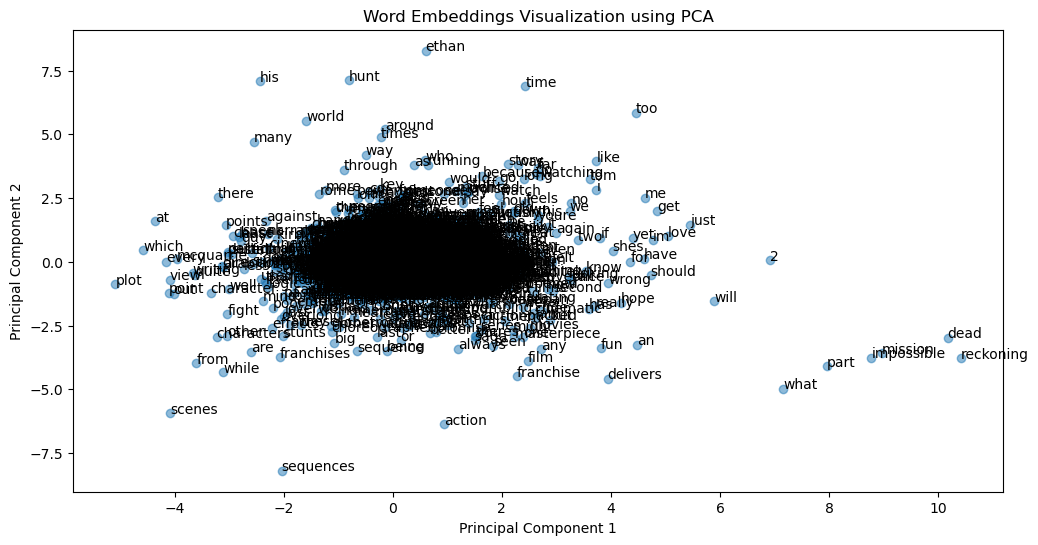

In [ ]:
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    return cleaned_text

def load_reviews_from_csv(filename):
    reviews = []
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            reviews.append(row[0])  # Assuming review text is in the first column
    return reviews

def tokenize(text):
    return text.split()

if __name__ == '__main__':
    filename = 'cleaned_movie_reviews .csv'
    reviews = load_reviews_from_csv(filename)

    cleaned_reviews = [clean_text(review) for review in reviews]
    tokenized_reviews = [tokenize(review) for review in cleaned_reviews]

    model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

    words = list(model.wv.index_to_key)
    X = model.wv[words]

    # Apply PCA to reduce dimensionality to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Visualize word embeddings in a scatter plot
    plt.figure(figsize=(12, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]))
    plt.title('Word Embeddings Visualization using PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


https://github.com/Sheela-1819/INFO-5731-Computational-Methods/blob/main/classified_reviews.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

Challenging parts:

1.Data Cleanup: Randomness of the text data had some issues and thus loading it as as a whole was also a not very simple thing to get done.

2.Model Training: The process of tuning the word embeddings and N-gram models needs to have the knowledge about involved parameters and selecting a configuration that will be suitable based on the input data.

3.Visualization: Making the right way of showing the results in the digestible format and making sure that they are informative can be equally challenging as well, especially when the analyzed data are large volumes of text data.


Enjoyable aspects:

1.Exploration: Working with print data exposed its paramount side in terms of patterns in language and some kind of insights about underlying structure of information.
    
2.Learning: The assignment had an impressive potential to study and use a couple of NLP methods which also gave me an amazing experience.